In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from pandas.io import gbq
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#extracting data from MIMIC III DATABASE

In [ ]:
query = "SELECT SUBJECT_ID,SEQ_NUM,ICD9_CODE FROM `physionet-data.mimiciii_clinical.diagnoses_icd` where ICD9_CODE='25000'"
diag_icd_df = gbq.read_gbq(query, project_id = "")

In [ ]:
query = f"SELECT HADM_ID,SUBJECT_ID,ADMITTIME,DISCHTIME,DEATHTIME,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS FROM `physionet-data.mimiciii_clinical.admissions` where SUBJECT_ID in (select SUBJECT_ID from `physionet-data.mimiciii_clinical.diagnoses_icd` where ICD9_CODE='25000')"
admission_df = gbq.read_gbq(query, project_id = "")

In [ ]:
query = "SELECT SUBJECT_ID,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,LOS FROM `physionet-data.mimiciii_clinical.icustays` where SUBJECT_ID in (select SUBJECT_ID from `physionet-data.mimiciii_clinical.diagnoses_icd` where ICD9_CODE='25000')"
icu_stay_df = gbq.read_gbq(query, project_id = "")

In [ ]:
query = "SELECT SUBJECT_ID,GENDER,DOB, FROM `physionet-data.mimiciii_clinical.patients`  where SUBJECT_ID in (select SUBJECT_ID from `physionet-data.mimiciii_clinical.diagnoses_icd` where ICD9_CODE='25000')"
paitents_df = gbq.read_gbq(query, project_id = "")

## DATA FRAMES FUSED TO MAKE INTERPRETATION OR VISULIZATION DATA MORE USEFUL

In [ ]:
frame_list =[diag_icd_df,admission_df,icu_stay_df,paitents_df]
for i in range(0,len(frame_list)-1):
  if i ==0:
    merged = frame_list[i].merge(frame_list[i+1], how='outer', on='SUBJECT_ID')
  else:
    merged = merged.merge(frame_list[i+1], how='outer', on='SUBJECT_ID')

In [ ]:
merged.head(6)

,SUBJECT_ID,SEQ_NUM,ICD9_CODE,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,LOS,GENDER,DOB
0,4096,7,25000,161677,2170-06-05 19:49:00,2170-06-22 16:00:00,NaT,BLACK/AFRICAN AMERICAN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,PROTESTANT QUAKER,SINGLE,MICU,MICU,15.0,15.0,2.1430,M,2091-09-11
1,4096,7,25000,161677,2170-06-05 19:49:00,2170-06-22 16:00:00,NaT,BLACK/AFRICAN AMERICAN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,PROTESTANT QUAKER,SINGLE,SICU,SICU,33.0,33.0,1.0524,M,2091-09-11
2,4096,7,25000,124383,2170-07-20 18:09:00,2170-07-26 13:30:00,NaT,BLACK/AFRICAN AMERICAN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,PROTESTANT QUAKER,SINGLE,MICU,MICU,15.0,15.0,2.1430,M,2091-09-11
3,4096,7,25000,124383,2170-07-20 18:09:00,2170-07-26 13:30:00,NaT,BLACK/AFRICAN AMERICAN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,PROTESTANT QUAKER,SINGLE,SICU,SICU,33.0,33.0,1.0524,M,2091-09-11
4,4864,3,25000,199793,2143-08-23 07:15:00,2143-08-28 13:15:00,NaT,WHITE,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Private,CATHOLIC,MARRIED,CSRU,CSRU,14.0,14.0,3.0328,M,2090-03-11
5,7936,13,25000,102376,2157-10-15 15:03:00,2157-10-20 14:31:00,NaT,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,JEWISH,MARRIED,CSRU,CSRU,14.0,14.0,1.1451,M,1849-06-23


In [ ]:
merged.columns

Index(['SUBJECT_ID', 'SEQ_NUM', 'ICD9_CODE', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'DEATHTIME', 'ETHNICITY', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS',
       'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID', 'LOS',
       'GENDER', 'DOB'],
      dtype='object')

In [ ]:
merged.isnull().sum()

SUBJECT_ID                0
SEQ_NUM                   0
ICD9_CODE                 0
HADM_ID                   0
ADMITTIME                 0
DISCHTIME                 0
DEATHTIME             66578
ETHNICITY                 0
ADMISSION_TYPE            0
ADMISSION_LOCATION        0
INSURANCE                 0
RELIGION                127
MARITAL_STATUS          640
FIRST_CAREUNIT            7
LAST_CAREUNIT             7
FIRST_WARDID              7
LAST_WARDID               7
LOS                       7
GENDER                    0
DOB                       0
dtype: int64

# Data Exploration and Analysis


Here we will ease the dataset and distribution of the data in their dataframe , in addition we have to masure LOS and have to find out the features that are useful or have influnce to predict our target class. Our target class is Length of stay (LOS)


In [ ]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [ ]:
for i in frame_list:
  print("Data Frame: \t",*namestr(i, globals()),sep=' ')
  print("\n\n\t\t",i.info())

Data Frame: 	 diag_icd_df i
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9058 entries, 0 to 9057
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SUBJECT_ID  9058 non-null   int64 
 1   SEQ_NUM     9058 non-null   int64 
 2   ICD9_CODE   9058 non-null   object
dtypes: int64(2), object(1)
memory usage: 212.4+ KB


		 None
Data Frame: 	 admission_df i
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11183 entries, 0 to 11182
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   HADM_ID             11183 non-null  int64         
 1   SUBJECT_ID          11183 non-null  int64         
 2   ADMITTIME           11183 non-null  datetime64[ns]
 3   DISCHTIME           11183 non-null  datetime64[ns]
 4   DEATHTIME           1201 non-null   datetime64[ns]
 5   ETHNICITY           11183 non-null  object        
 6   ADMISSION_TYP

In [ ]:
for i in range(0,len(frame_list)):
  print("Data Frame: \t",*namestr(frame_list[i], globals()),sep=' ')
  if i==1:
    print(f"The number of unique events: \t {len(frame_list[i]['HADM_ID'].unique())}")
  print(f"The number of unique paitents: \t {len(frame_list[i]['SUBJECT_ID'].unique())}\n")

Data Frame: 	 diag_icd_df
The number of unique paitents: 	 7370

Data Frame: 	 admission_df
The number of unique events: 	 11183
The number of unique paitents: 	 7370

Data Frame: 	 icu_stay_df
The number of unique paitents: 	 7363

Data Frame: 	 paitents_df
The number of unique paitents: 	 7370



## LOS ( length of stay measurement)

from the admission table time diffenrences between admission and discharge is the length of stay of a paitnet

In [ ]:
FULL_LOS = [(merged['DISCHTIME'][i] - merged['ADMITTIME'][i]).days for i in merged.index]

In [ ]:
merged['FULL_LOS'] = FULL_LOS

In [ ]:
merged[['DISCHTIME','ADMITTIME','FULL_LOS']].head(5)

,DISCHTIME,ADMITTIME,FULL_LOS
0,2170-06-22 16:00:00,2170-06-05 19:49:00,16
1,2170-06-22 16:00:00,2170-06-05 19:49:00,16
2,2170-07-26 13:30:00,2170-07-20 18:09:00,5
3,2170-07-26 13:30:00,2170-07-20 18:09:00,5
4,2143-08-28 13:15:00,2143-08-23 07:15:00,5


In [ ]:
merged[merged['FULL_LOS']<0]['FULL_LOS']

5815    -1
11280   -1
21783   -1
21798   -1
21799   -1
21802   -1
21803   -1
23705   -1
30165   -1
35538   -1
36337   -1
42328   -1
42329   -1
42330   -1
42331   -1
42332   -1
42333   -1
42334   -1
42377   -1
42378   -1
42379   -1
42380   -1
42381   -1
42382   -1
42383   -1
42426   -1
42427   -1
42428   -1
42429   -1
42430   -1
42431   -1
42432   -1
44039   -1
56734   -1
Name: FULL_LOS, dtype: int64

In [ ]:
prev_shape=merged.shape
prev_shape

(70410, 21)

In [ ]:
#so there exists negative LOS which indicates there is problem 
# in those datapoints for perfecting the models we will drop them
merged = merged.loc[merged['FULL_LOS']>0]
merged.head(3)

,SUBJECT_ID,SEQ_NUM,ICD9_CODE,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,...,RELIGION,MARITAL_STATUS,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,LOS,GENDER,DOB,FULL_LOS
0,4096,7,25000,161677,2170-06-05 19:49:00,2170-06-22 16:00:00,NaT,BLACK/AFRICAN AMERICAN,EMERGENCY,EMERGENCY ROOM ADMIT,...,PROTESTANT QUAKER,SINGLE,MICU,MICU,15.0,15.0,2.1430,M,2091-09-11,16
1,4096,7,25000,161677,2170-06-05 19:49:00,2170-06-22 16:00:00,NaT,BLACK/AFRICAN AMERICAN,EMERGENCY,EMERGENCY ROOM ADMIT,...,PROTESTANT QUAKER,SINGLE,SICU,SICU,33.0,33.0,1.0524,M,2091-09-11,16
2,4096,7,25000,124383,2170-07-20 18:09:00,2170-07-26 13:30:00,NaT,BLACK/AFRICAN AMERICAN,EMERGENCY,EMERGENCY ROOM ADMIT,...,PROTESTANT QUAKER,SINGLE,MICU,MICU,15.0,15.0,2.1430,M,2091-09-11,5


In [ ]:
print(f"Number of dropped rows {prev_shape[0]-merged.shape[0]}")

Number of dropped rows 1639


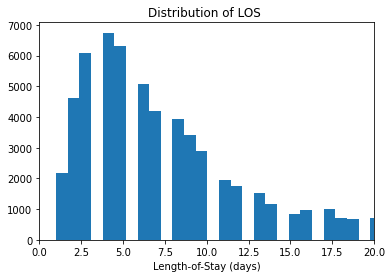

In [ ]:
# LOS Distribution
plt.hist(merged['FULL_LOS'], bins=200)
plt.title('Distribution of LOS ')
plt.xlabel('Length-of-Stay (days)')
plt.xlim(0, 20)
plt.show();

## checking if there is any data point containing  values in death time columns , because the paitents containing  death time , they actual died while staying in hospitals thats why we will delete those  data points as they dont have length of stay becasue they were never discraged

In [ ]:
print(f" number of death case {merged['DEATHTIME'].notnull().sum()}")

 number of death case0


In [ ]:
merged=merged.loc[merged['DEATHTIME'].isnull()==True]
merged.shape

(65397, 21)

## Age Calculation
we will determine the age fron the time differnce from DOB to Admit time

In [ ]:
from sqlite3.dbapi2 import Timestamp
from datetime import timedelta
dat2= merged['ADMITTIME'][2].to_pydatetime()
dat1 =  merged['DOB'][2].to_pydatetime()
#timedelta((merged['ADMITTIME'][2] - merged['DOB'][2]))
dat2

datetime.datetime(2170, 7, 20, 18, 9)

In [ ]:
AGE = [(merged['ADMITTIME'][i].to_pydatetime() -  merged['DOB'][i].to_pydatetime()).days for i in merged.index]

In [ ]:
merged['AGE'] = AGE

In [ ]:
#checking the exitance of negative age in days
merged[merged['AGE']<0]['AGE'].shape[0]

0

In [ ]:
#checing the existance of age that is impossible in reality 
#for that we set the limit age to 100 years 
merged.loc[merged['AGE']>(100*365)]['AGE'].shape[0]

2314

In [ ]:
#droping the data points for unrealistic age
merged= merged.loc[merged['AGE']<(100*365)]

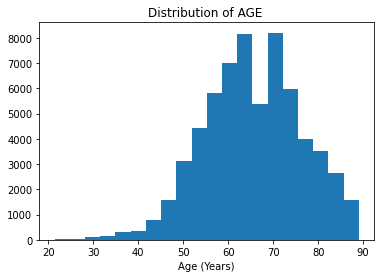

In [ ]:
# LOS Distribution
plt.hist([i/365 for i in merged['AGE']], bins=20)
plt.title('Distribution of AGE ')
plt.xlabel('Age (Years)')
plt.show();

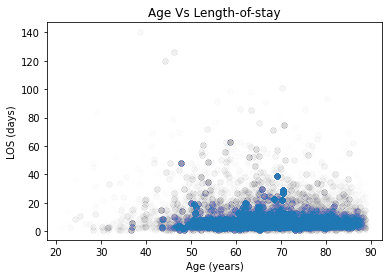

In [ ]:
plt.scatter([i/365 for i in merged['AGE']], merged['FULL_LOS'], alpha=0.005)
plt.ylabel('LOS (days)')
plt.xlabel('Age (years)')
plt.title('Age Vs Length-of-stay')
plt.show()

## Number treatments or procedure that has implemneted on particular paitnets

for acheiving the number we have to count how many unique icd 9 code that is distributed on a paitents to find it out we have to calculate the repitation of same icd 9 code in order

In [ ]:
total_weight = []

for i in merged['ICD9_CODE']:
  counter=0
  for j in merged['ICD9_CODE']:
    if j==i:
      counter+=1
  total_weight.append(counter)

In [ ]:
merged['PROCEDURES_NUMBER'] = total_weight

## Discreatization of The LOS 
basically for a better classifcation model categorizing a column with a condition always helps , if its the target class then its mendatory so we have categorized the LOS values into two categorize short and long stays

In [ ]:
category = []
for i in merged['FULL_LOS']:
  if i > 5:
    category.append('long')
  else:
    category.append('short')

In [ ]:
merged['LOS_CATEGORY'] = category

In [ ]:
print(f"Number of Instances {merged.shape[0]}")
print(f"Number of columns {merged.shape[1]}")
print(" columns\n\t\t",*merged.columns,sep = " \n")


Number of Instances 70410
Number of columns 24
 columns
		 
SUBJECT_ID 
SEQ_NUM 
ICD9_CODE 
HADM_ID 
ADMITTIME 
DISCHTIME 
ETHNICITY 
ADMISSION_TYPE 
ADMISSION_LOCATION 
INSURANCE 
RELIGION 
MARITAL_STATUS 
FIRST_CAREUNIT 
LAST_CAREUNIT 
FIRST_WARDID 
LAST_WARDID 
LOS 
GENDER 
DOB 
FULL_LOS 
AGE 
PROCEDURES_NUMBER 
LOS_CATEGORY 
LOS_CATEGORY_numeric


In [ ]:
merged.reset_index(inplace=True,drop=True)
merged.head()

,SUBJECT_ID,SEQ_NUM,ICD9_CODE,HADM_ID,ADMITTIME,DISCHTIME,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,...,FIRST_WARDID,LAST_WARDID,LOS,GENDER,DOB,FULL_LOS,AGE,PROCEDURES_NUMBER,LOS_CATEGORY,LOS_CATEGORY_numeric
0,4096,7,25000,161677,2170-06-05 19:49:00,2170-06-22 16:00:00,BLACK/AFRICAN AMERICAN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,...,MICU,MICU,2.1430,M,2091-09-11,16,28756,70410,long,0
1,4096,7,25000,161677,2170-06-05 19:49:00,2170-06-22 16:00:00,BLACK/AFRICAN AMERICAN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,...,SICU,SICU,1.0524,M,2091-09-11,16,28756,70410,long,0
2,4096,7,25000,124383,2170-07-20 18:09:00,2170-07-26 13:30:00,BLACK/AFRICAN AMERICAN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,...,MICU,MICU,2.1430,M,2091-09-11,5,28801,70410,short,1
3,4096,7,25000,124383,2170-07-20 18:09:00,2170-07-26 13:30:00,BLACK/AFRICAN AMERICAN,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,...,SICU,SICU,1.0524,M,2091-09-11,5,28801,70410,short,1
4,4864,3,25000,199793,2143-08-23 07:15:00,2143-08-28 13:15:00,WHITE,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Private,...,CSRU,CSRU,3.0328,M,2090-03-11,5,19522,70410,short,1


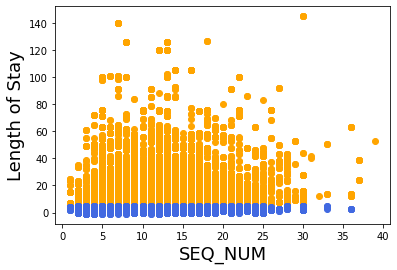

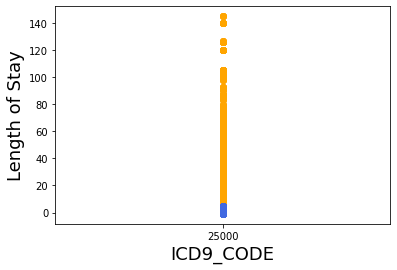

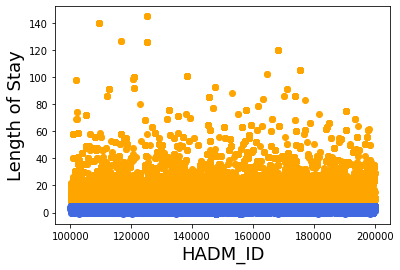

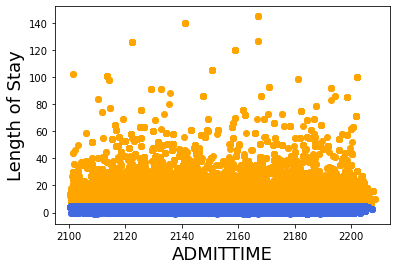

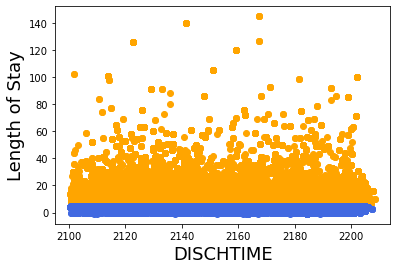

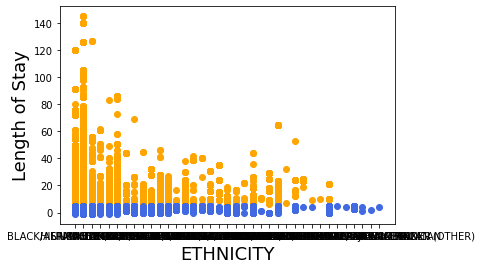

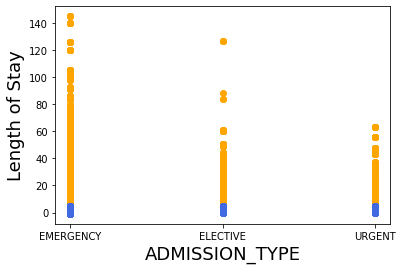

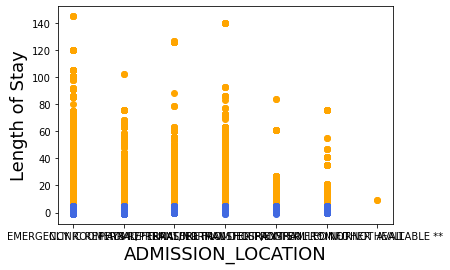

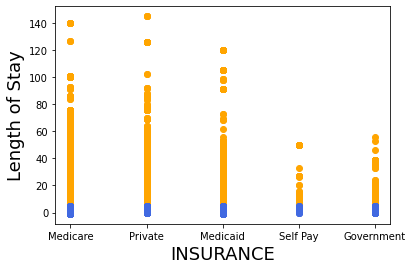

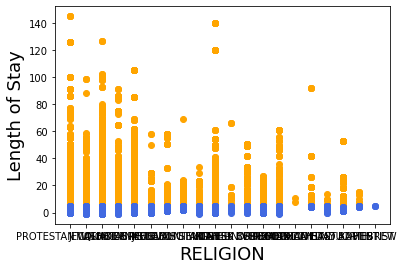

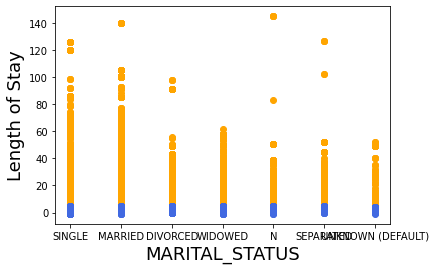

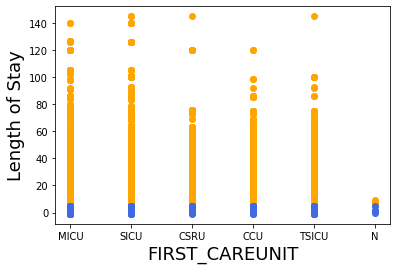

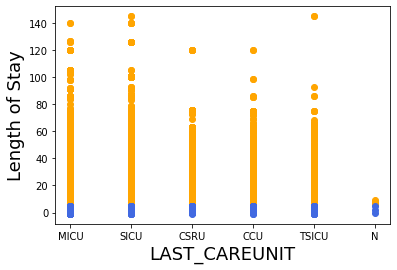

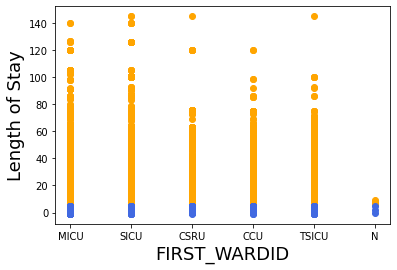

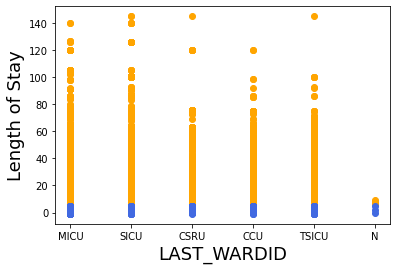

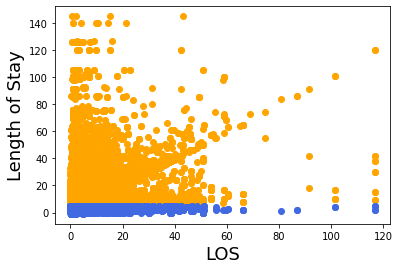

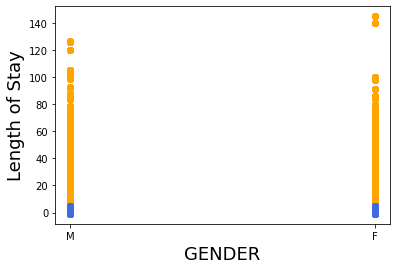

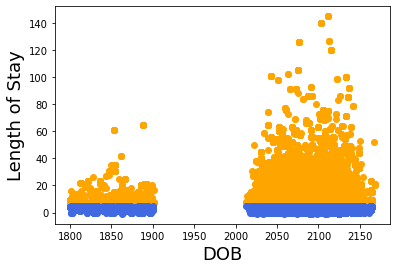

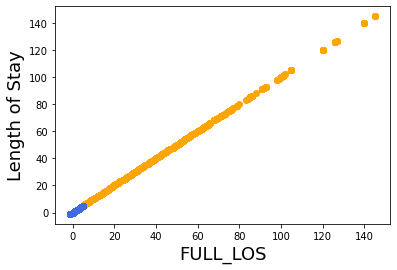

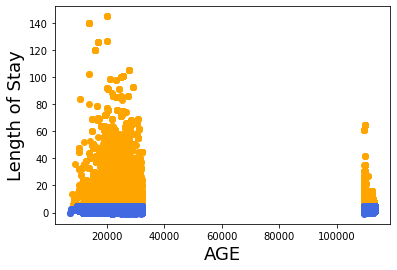

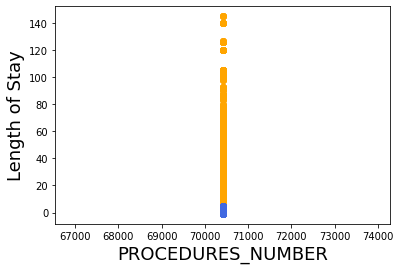

In [ ]:
feature_names=[ i for i in merged.columns if i !='LOS_CATEGORY' and i!='LOS_CATEGORY_numeric' and i!='SUBJECT_ID']

for i in feature_names:
  try:
    plt.scatter(merged.loc[merged['LOS_CATEGORY_numeric']==0][i],merged.loc[merged['LOS_CATEGORY_numeric']==0]['FULL_LOS'], color="orange", label="0")
    plt.scatter(merged.loc[merged['LOS_CATEGORY_numeric']==1][i],merged.loc[merged['LOS_CATEGORY_numeric']==1]['FULL_LOS'], color="royalblue", label="1")
    plt.xlabel(i, fontsize=18)
    plt.ylabel('Length of Stay', fontsize=18)
    plt.show()
  except:
    print(i)
    print('breaking')
    break

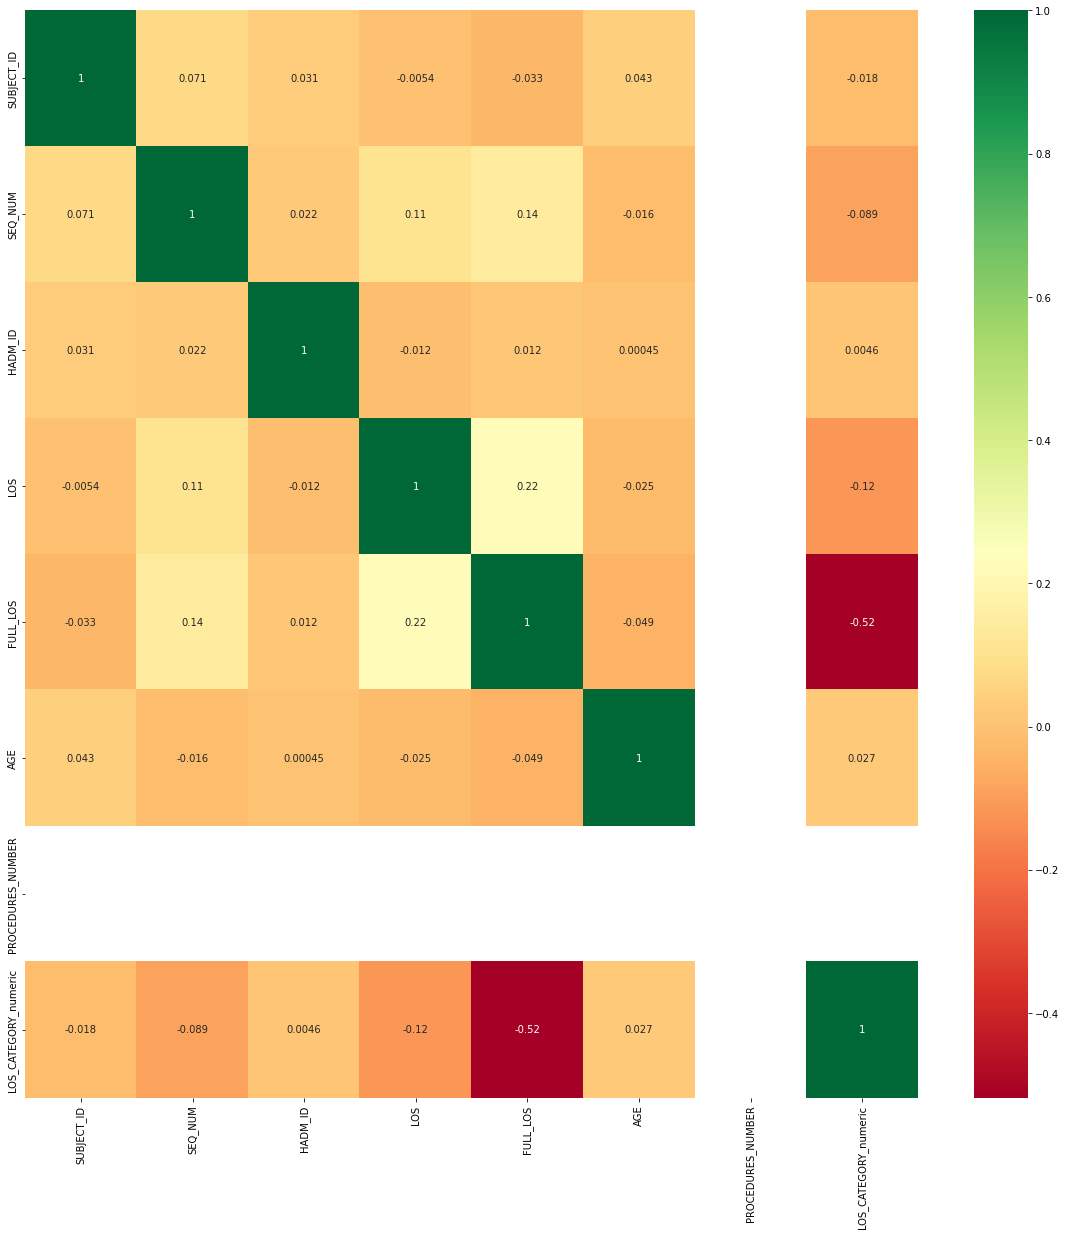

In [ ]:
import seaborn as sns

corr_mat = merged.corr()
top_corr_features = corr_mat.index

plt.figure(figsize=(20,20))
g = sns.heatmap(merged[top_corr_features].corr(),annot= True, cmap = "RdYlGn")

# DATA PREPROCESSING

In [ ]:
#checking NULL values
merged.isnull()

,SUBJECT_ID,SEQ_NUM,ICD9_CODE,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,...,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,LOS,GENDER,DOB,FULL_LOS,AGE,PROCEDURES_NUMBER,LOS_CATEGORY
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70405,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70406,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70407,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70408,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
merged.isnull().sum()

SUBJECT_ID                0
SEQ_NUM                   0
ICD9_CODE                 0
HADM_ID                   0
ADMITTIME                 0
DISCHTIME                 0
DEATHTIME             63083
ETHNICITY                 0
ADMISSION_TYPE            0
ADMISSION_LOCATION        0
INSURANCE                 0
RELIGION                104
MARITAL_STATUS          471
FIRST_CAREUNIT            6
LAST_CAREUNIT             6
FIRST_WARDID              6
LAST_WARDID               6
LOS                       6
GENDER                    0
DOB                       0
FULL_LOS                  0
AGE                       0
PROCEDURES_NUMBER         0
LOS_CATEGORY              0
dtype: int64

### We have used deathtime to filter out the data poits that is neccesary but the use of deathtime is no more , so we are going to drop this column

In [ ]:
del merged['DEATHTIME']

In [ ]:
merged.columns

Index(['SUBJECT_ID', 'SEQ_NUM', 'ICD9_CODE', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'ETHNICITY', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'FIRST_CAREUNIT',
       'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID', 'LOS', 'GENDER', 'DOB',
       'FULL_LOS', 'AGE', 'PROCEDURES_NUMBER', 'LOS_CATEGORY'],
      dtype='object')

In [ ]:
merged.isnull().sum()

SUBJECT_ID              0
SEQ_NUM                 0
ICD9_CODE               0
HADM_ID                 0
ADMITTIME               0
DISCHTIME               0
ETHNICITY               0
ADMISSION_TYPE          0
ADMISSION_LOCATION      0
INSURANCE               0
RELIGION              104
MARITAL_STATUS        471
FIRST_CAREUNIT          6
LAST_CAREUNIT           6
FIRST_WARDID            6
LAST_WARDID             6
LOS                     6
GENDER                  0
DOB                     0
FULL_LOS                0
AGE                     0
PROCEDURES_NUMBER       0
LOS_CATEGORY            0
dtype: int64

### Handeling Null values 

deteting entire row of those null values may cause loss of other data that has effect over the target class beside the null values of those columns have very tiny effect on our LOS class

In [ ]:
merged['RELIGION'] = merged['RELIGION'].fillna('N')
merged['MARITAL_STATUS'] = merged['MARITAL_STATUS'].fillna('N')
merged['FIRST_CAREUNIT'] = merged['FIRST_CAREUNIT'].fillna('N')
merged['LAST_CAREUNIT'] = merged['LAST_CAREUNIT'].fillna('N')
merged['FIRST_WARDID'] = merged['FIRST_CAREUNIT'].fillna('N')
merged['LAST_WARDID'] = merged['FIRST_CAREUNIT'].fillna('N')
merged['LOS'] = merged['LOS'].fillna(0.0)
merged.isnull().sum()

SUBJECT_ID            0
SEQ_NUM               0
ICD9_CODE             0
HADM_ID               0
ADMITTIME             0
DISCHTIME             0
ETHNICITY             0
ADMISSION_TYPE        0
ADMISSION_LOCATION    0
INSURANCE             0
RELIGION              0
MARITAL_STATUS        0
FIRST_CAREUNIT        0
LAST_CAREUNIT         0
FIRST_WARDID          0
LAST_WARDID           0
LOS                   0
GENDER                0
DOB                   0
FULL_LOS              0
AGE                   0
PROCEDURES_NUMBER     0
LOS_CATEGORY          0
dtype: int64

In [ ]:
merged.columns

Index(['SUBJECT_ID', 'SEQ_NUM', 'ICD9_CODE', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'ETHNICITY', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'FIRST_CAREUNIT',
       'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID', 'LOS', 'GENDER', 'DOB',
       'FULL_LOS', 'AGE', 'PROCEDURES_NUMBER', 'LOS_CATEGORY',
       'LOS_CATEGORY_numeric'],
      dtype='object')

In [ ]:
#converting target class into numerical class
merged['LOS_CATEGORY_numeric'],uni = pd.factorize(merged['LOS_CATEGORY'])

In [ ]:
feature_names=[ i for i in merged.columns 
               if i !='LOS_CATEGORY' and i!='LOS_CATEGORY_numeric' and i!='SUBJECT_ID' and i!='FULL_LOS' and i!='ADMITTIME' and i!='DISCHTIME' and i!='DOB']

In [ ]:
feature_names

['SEQ_NUM',
 'ICD9_CODE',
 'HADM_ID',
 'ETHNICITY',
 'ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'INSURANCE',
 'RELIGION',
 'MARITAL_STATUS',
 'FIRST_CAREUNIT',
 'LAST_CAREUNIT',
 'FIRST_WARDID',
 'LAST_WARDID',
 'LOS',
 'GENDER',
 'AGE',
 'PROCEDURES_NUMBER']

In [ ]:
# spliting target class from other features
x = merged[feature_names]
y= np.asarray(merged['LOS_CATEGORY_numeric'])

In [ ]:
# converting every string and categrical features into it's numerical represtation
list_of_non_string_features =[]
for i in x.columns:
  if type(x[i][0]) == type('l'):
    name = f"{i}_num"
    x[name],_=pd.factorize(x[i])
  else:
    print(f"not String \t {i}")
    list_of_non_string_features.append(i)

not String 	 SEQ_NUM
not String 	 HADM_ID
not String 	 LOS
not String 	 AGE
not String 	 PROCEDURES_NUMBER


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
feature_names= [i for i in x.columns if 'num' in i] + list_of_non_string_features
feature_names

['ICD9_CODE_num',
 'ETHNICITY_num',
 'ADMISSION_TYPE_num',
 'ADMISSION_LOCATION_num',
 'INSURANCE_num',
 'RELIGION_num',
 'MARITAL_STATUS_num',
 'FIRST_CAREUNIT_num',
 'LAST_CAREUNIT_num',
 'FIRST_WARDID_num',
 'LAST_WARDID_num',
 'GENDER_num',
 'SEQ_NUM',
 'HADM_ID',
 'LOS',
 'AGE',
 'PROCEDURES_NUMBER']

In [ ]:
#converting datas into numpy array
x = x[feature_names].values

In [ ]:
x

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1430e+00, 2.8756e+04,
        6.3083e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0524e+00, 2.8756e+04,
        6.3083e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1430e+00, 2.8801e+04,
        6.3083e+04],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 2.2430e+00, 2.8296e+04,
        6.3083e+04],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 6.0569e+00, 2.4402e+04,
        6.3083e+04],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.2430e+00, 2.4402e+04,
        6.3083e+04]])

#Several Machine Learning algorithms are evaluated:

In [ ]:

# spliting data into train and test samples
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.33, random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier().fit(x_train,y_train)

y_predict = DecisionTree.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[0 0 0 ... 0 0 0]

y_test 
[0 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     12252
           1       0.88      0.89      0.88      8566

    accuracy                           0.90     20818
   macro avg       0.90      0.90      0.90     20818
weighted avg       0.90      0.90      0.90     20818


confusion_matrix 
[[11195  1057]
 [  940  7626]]

 Accuracy Score 
 0.9040733980209434


In [ ]:
#create and train the naive Bayes Classifier 
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB().fit(x_train,y_train)
y_predict = MultinomialNB.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[1 1 1 ... 0 1 1]

y_test 
[0 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.60      0.54      0.57     12252
           1       0.43      0.50      0.46      8566

    accuracy                           0.52     20818
   macro avg       0.52      0.52      0.51     20818
weighted avg       0.53      0.52      0.52     20818


confusion_matrix 
[[6558 5694]
 [4289 4277]]

 Accuracy Score 
 0.5204630608127582


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(x_train,y_train)

y_predict = knn.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")
accbefore = accuracy_score(y_test,y_predict)


Y_predict 
[0 0 0 ... 0 0 0]

y_test 
[0 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     12252
           1       0.91      0.90      0.91      8566

    accuracy                           0.92     20818
   macro avg       0.92      0.92      0.92     20818
weighted avg       0.92      0.92      0.92     20818


confusion_matrix 
[[11531   721]
 [  869  7697]]

 Accuracy Score 
 0.923623787107311


In [ ]:
from sklearn.svm import SVC
svc = SVC().fit(x_train,y_train)

y_predict = svc.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[0 0 0 ... 0 0 0]

y_test 
[0 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74     12252
           1       0.00      0.00      0.00      8566

    accuracy                           0.59     20818
   macro avg       0.29      0.50      0.37     20818
weighted avg       0.35      0.59      0.44     20818


confusion_matrix 
[[12252     0]
 [ 8566     0]]

 Accuracy Score 
 0.5885291574598904


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn. ensemble import VotingClassifier
votingClf = VotingClassifier(estimators=[('decisionTree',DecisionTree),
('naiveBayes',MultinomialNB),('knn',knn),('svc',svc)],voting='hard')
votingClf.fit(x_train,y_train)

y_predict = votingClf.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[0 0 0 ... 0 0 0]

y_test 
[0 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.71      0.99      0.83     12252
           1       0.97      0.43      0.59      8566

    accuracy                           0.76     20818
   macro avg       0.84      0.71      0.71     20818
weighted avg       0.82      0.76      0.73     20818


confusion_matrix 
[[12143   109]
 [ 4919  3647]]

 Accuracy Score 
 0.7584782399846287


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=4)
bagging.fit(x_train,y_train)

y_predict = bagging.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[0 0 0 ... 0 0 0]

y_test 
[0 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     12252
           1       0.94      0.83      0.88      8566

    accuracy                           0.91     20818
   macro avg       0.91      0.90      0.90     20818
weighted avg       0.91      0.91      0.91     20818


confusion_matrix 
[[11787   465]
 [ 1444  7122]]

 Accuracy Score 
 0.9083005091747526


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(n_estimators=4)
adaBoost.fit(x_train,y_train)

y_predict = adaBoost.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[0 0 0 ... 0 1 0]

y_test 
[0 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.64      0.79      0.71     12252
           1       0.54      0.36      0.43      8566

    accuracy                           0.61     20818
   macro avg       0.59      0.57      0.57     20818
weighted avg       0.60      0.61      0.59     20818


confusion_matrix 
[[9685 2567]
 [5500 3066]]

 Accuracy Score 
 0.6124987991161495


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=4)
randomForest.fit(x_train,y_train)

y_predict = randomForest.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[0 0 0 ... 0 0 0]

y_test 
[0 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     12252
           1       0.92      0.78      0.85      8566

    accuracy                           0.88     20818
   macro avg       0.89      0.87      0.88     20818
weighted avg       0.89      0.88      0.88     20818


confusion_matrix 
[[11704   548]
 [ 1858  6708]]

 Accuracy Score 
 0.8844269382265347


In [ ]:
dict_acc ={'decisionTree':accuracy_score(y_test,DecisionTree.predict(x_test)),
           'naiveBayes':accuracy_score(y_test,MultinomialNB.predict(x_test)),
           'KNN':accuracy_score(y_test,knn.predict(x_test)),
           'SVC':accuracy_score(y_test,svc.predict(x_test)),
           'Ensemble_voting':accuracy_score(y_test,votingClf.predict(x_test)),
           'bagging':accuracy_score(y_test,bagging.predict(x_test)),
           'AdaBoost':accuracy_score(y_test,adaBoost.predict(x_test)),
           'Random Forest':accuracy_score(y_test,randomForest.predict(x_test))
           }

In [ ]:
for i in dict_acc:
    print(f"{i}\t\n\t{dict_acc[i]}")

decisionTree	
	0.9040733980209434
naiveBayes	
	0.5204630608127582
KNN	
	0.923623787107311
SVC	
	0.5885291574598904
Ensemble_voting	
	0.7584782399846287
bagging	
	0.9083005091747526
AdaBoost	
	0.6124987991161495
Random Forest	
	0.8844269382265347


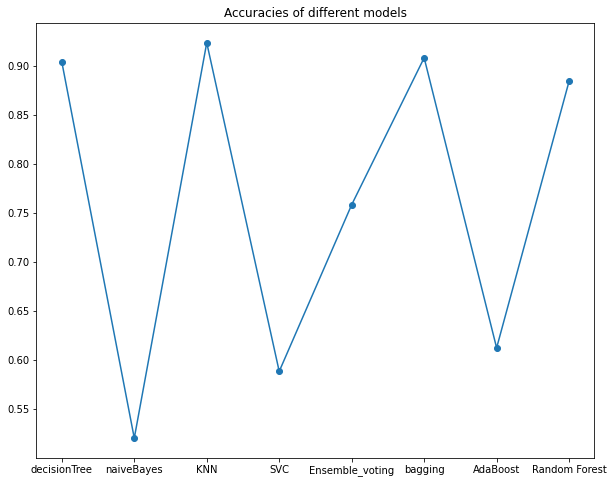

In [ ]:
keyes = [i for i in dict_acc]
values = [dict_acc[i]for i in dict_acc]

plt.figure(figsize=(10,8))
plt.plot(keyes,values)
plt.scatter(list(range(8)),values)
plt.title("Accuracies of different models")

plt.show()

## KNN showed up being the best model.Now, let's tune its hyperparameters.

In [ ]:
#####################
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,2))
n_neighbors = list(range(1,5))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
######################

Best leaf_size: 1
Best p: 1
Best n_neighbors: 4


Running KNN again, with the new hyperparemeters:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, leaf_size = 1, p=1)
knn.fit(x_train,y_train)

y_predict = knn.predict(x_test)
print(f"\nY_predict \n{y_predict}")
print(f"\ny_test \n{y_test}")
#evaluate 
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(f"\nclassification_report \n{classification_report(y_test,y_predict)}")
print(f"\nconfusion_matrix \n{confusion_matrix(y_test,y_predict)}")
print(f"\n Accuracy Score \n {accuracy_score(y_test,y_predict)}")


Y_predict 
[0 0 0 ... 0 0 0]

y_test 
[0 0 0 ... 0 0 0]

classification_report 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12252
           1       0.94      0.89      0.91      8566

    accuracy                           0.93     20818
   macro avg       0.93      0.92      0.93     20818
weighted avg       0.93      0.93      0.93     20818


confusion_matrix 
[[11773   479]
 [  961  7605]]

 Accuracy Score 
 0.9308290902103948


In [ ]:
print("Accuracy before: " + str(accbefore))

Accuracy before: 0.923623787107311


In [ ]:


# query and table merge and analysis = jishiya 

# data analysis , exploration , feature engineering = Tanjil

# preprocessing = andre

# model implemnation evaluation  = andre

# hypertunning = Masha 